In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [42]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df.drop(columns=["Id"], inplace=True)
print("Shape:", df.shape, "\n")
print("Missing values:\n", df.isnull().sum(), "\n")
print("Target distribution:\n", df["Species"].value_counts(), "\n")

Shape: (150, 5) 

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Target distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64 



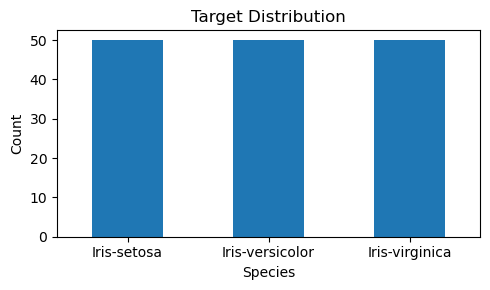

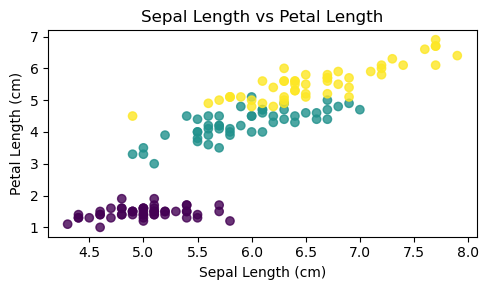

In [60]:
# -------- Plot 1: Target Distribution --------
plt.figure(figsize=(5, 3))
df["Species"].value_counts().plot(kind="bar")
plt.title("Target Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n")

# -------- Plot 2: Sepal vs Petal Length --------
plt.figure(figsize=(5, 3))
plt.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    c=df["Species"].astype("category").cat.codes,
    alpha=0.8
)
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()

In [62]:
# ================== Train / Validation Split ==================
X = df.drop("Species", axis=1)
y = df["Species"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

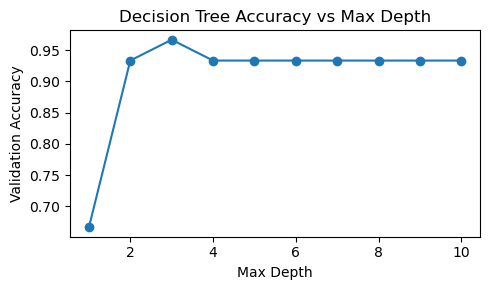

Best Max Depth: 3


In [64]:
depths = range(1, 11)
accuracies = []

for d in depths:
    tree = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

# -------- Plot Accuracy vs Depth --------
plt.figure(figsize=(5, 3))
plt.plot(depths, accuracies, marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.tight_layout()
plt.show()

best_depth = depths[accuracies.index(max(accuracies))]
print("Best Max Depth:", best_depth)

In [70]:
# ================== Final Decision Tree ==================
final_tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_depth,
    random_state=42
)
final_tree.fit(X_train, y_train)

y_pred = final_tree.predict(X_val)

# ================== Metrics ==================
print("\n--- Decision Tree Metrics ---")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score (weighted):", f1_score(y_val, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


--- Decision Tree Metrics ---
Accuracy: 0.9666666666666667
F1 Score (weighted): 0.9665831244778613

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



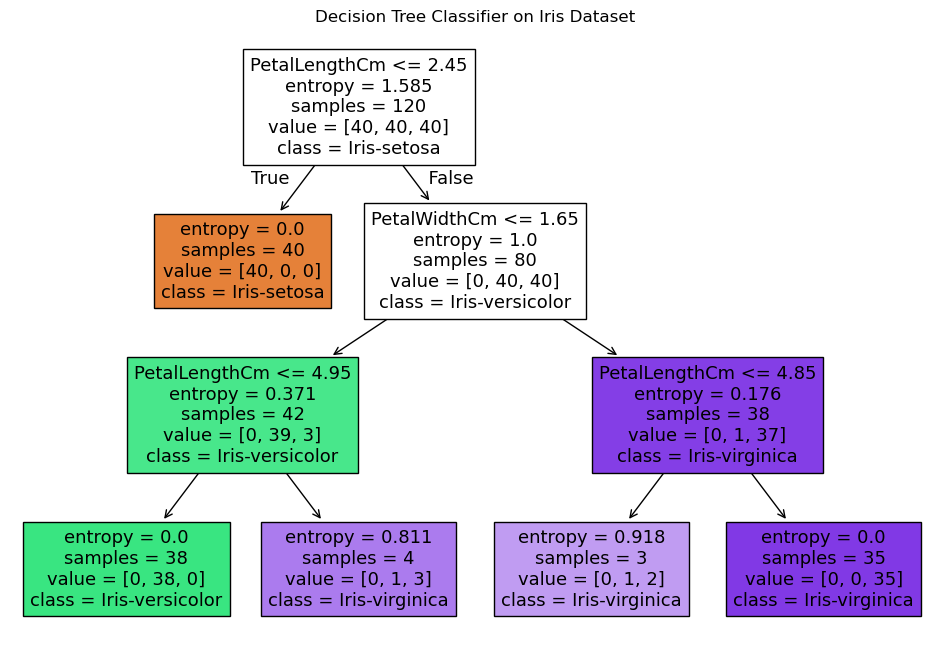

In [76]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(final_tree, feature_names=X.columns, class_names=final_tree.classes_, filled=True)
plt.title("Decision Tree Classifier on Iris Dataset")
plt.show()

In [ ]:
"""
Conclusion:
1. A Decision Tree classifier using the entropy criterion was trained on the Iris dataset.
2. The max_depth parameter was tuned to control the complexity of the tree.
3. Shallow trees underfit the data, whereas deeper trees showed a tendency to overfit.
4. The depth yielding the highest validation accuracy was selected as the optimal model.
5. This experiment highlights the importance of hyperparameter tuning in tree-based models.
"""